# 📊 Notebook 1: Data Exploration & Preprocessing
**Dataset:** German Credit Data

This notebook performs data loading, cleaning, exploratory analysis, and feature engineering.

In [1]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 📁 Load Dataset
# Replace with your actual file path if different
df = pd.read_csv('german_credit_data.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
# 🧹 Initial Inspection
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


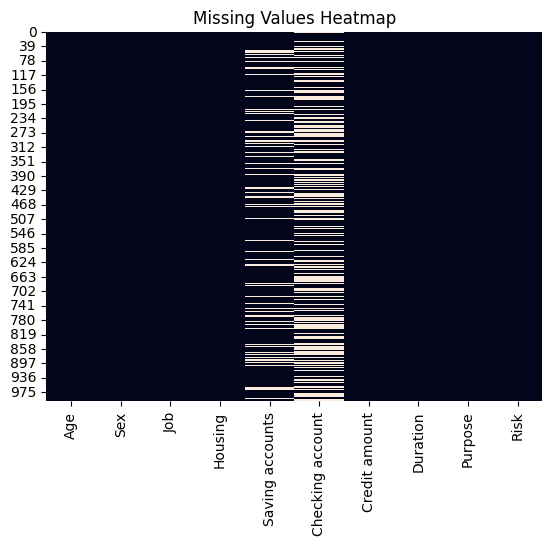

In [7]:
# 📊 Visualize Missing Values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# 🧼 Data Cleaning Example
# Fill or drop missing values (adjust based on actual data)
df.dropna(inplace=True)  # or use fillna()
# Convert categorical values if necessary
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

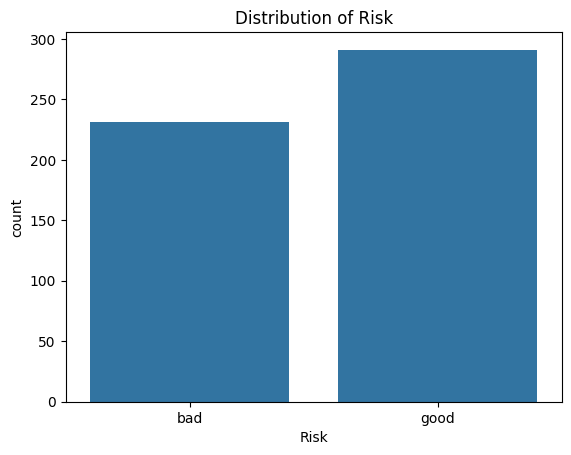

In [9]:
# 🔍 Exploratory Data Analysis (EDA)
# Distribution of target
sns.countplot(data=df, x='Risk')
plt.title('Distribution of Risk')
plt.show()

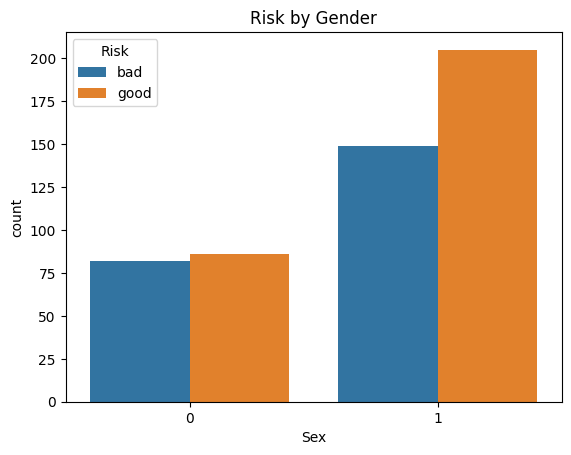

In [10]:
# 📈 Sensitive Attribute Distributions
sns.countplot(data=df, x='Sex', hue='Risk')
plt.title('Risk by Gender')
plt.show()

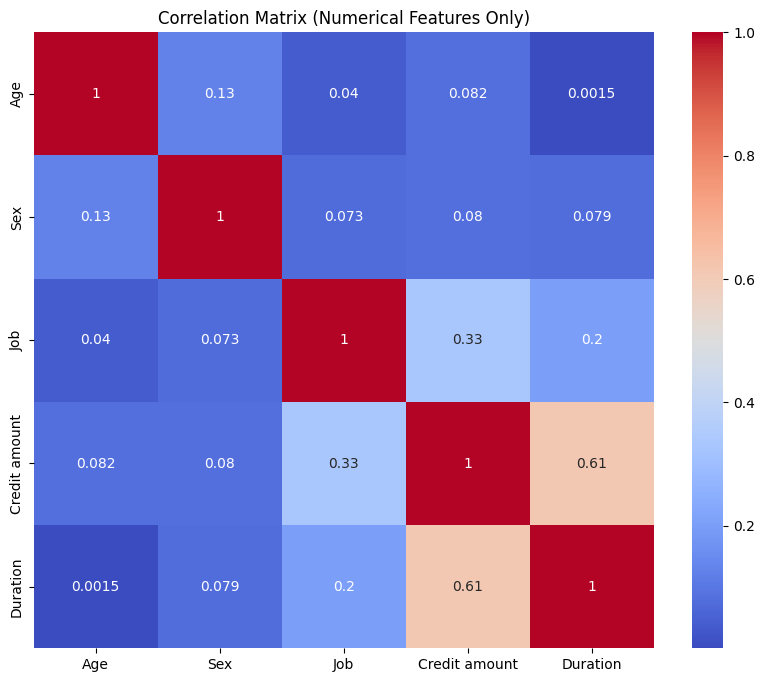

In [14]:
# 🔗 Correlation Heatmap (Numerical columns only)
numeric_df = df.select_dtypes(include=[np.number])  # select numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()


In [12]:
# 🏗️ Feature Engineering
# Encode other categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Sex,Job,Credit amount,Duration,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
1,22,0,2,5951,48,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,45,1,2,7882,42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,53,1,2,4870,24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7,35,1,3,6948,36,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True
9,28,1,3,5234,30,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False


In [13]:
# 💾 Save Cleaned Dataset
df.to_csv('cleaned_credit_data.csv', index=False)
print('Cleaned dataset saved as cleaned_credit_data.csv')

Cleaned dataset saved as cleaned_credit_data.csv
